# Bibliotecas

In [2]:
# Análise Exploratória
import pandas as pd
import numpy as np
import locale
import missingno as msno

# Configurações do Pandas
pd.options.display.max_columns = 300
pd.options.display.max_rows = 50

# Configuração de localização
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')  # Seta os meses, horas e etc para br

# Bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando Base & Padronização das Colunas

In [3]:
application_df = pd.read_csv(
    r"..\..\Bases\StepWise Aplication Data (Processado).csv",
    parse_dates = ['data'],
    dtype = {
        'inadimplencia' : 'Int64',
        'score_fragilidade_social' : 'Int64',
        'score_credito' : 'Int64'
    }
)

application_df.head(2)

,data,inadimplencia,amostra,score_fragilidade_social,score_credito,porte,is_mei,faturamento_presumido,uf,natureza_juridica,cnae_secao,tempo_dias_entrada_socios_media,tempo_meses_de_existencia_da_matriz_ate_data_referencia,qtde_total_cnae,qnt_socios_administradores,valor_aluguel_reais_igpm,per_capita_reais,cep_consultado_pct_0_ate_1_quarto_salario_minimo,qtde_enderecos_favorecidos_socialmente_2km,qtde_enderecos_desfavorecidos_socialmente_2km,qtde_hospital_3km,pct_trabalhadores_sem_carteira_assinada,pct_cnpj_ativa_opcao_mei_no_cep,pct_abastecimento_agua_canalizacao_total,pct_domicilio_adequado,pct_esgoto_ceu_aberto,pct_arborizacao,pct_desempregados_em_busca_trabalho,pct_possui_automovel,pct_possui_radio,pct_existencia_moto,pct_existencia_geladeira,pct_regiao_ocupada_sim,pct_tempo_gasto_deslocamento_trabalho_0_5_min,pct_tempo_gasto_deslocamento_trabalho_6_30_min,pct_tempo_gasto_deslocamento_trabalho_31_60_min,pct_tempo_gasto_deslocamento_trabalho_mais_120_min
0,2021-02-10,0,DES,553,842,DEMAIS,False,11000000.0,SP,COOPERATIVA,"Atividades Financeiras, De Seguros E Serviços ...",982.0,590.0,1.0,0.0,972.634929,5203.00,4.829,3.0,0.0,54.0,10.606,34.43,97.275,99.53,0.00,74.79,5.450,67.505,82.600,88.727,96.855,96.284,16.017,66.450,15.801,0.000
1,2020-07-31,0,DES,783,142,DEMAIS,False,41500.0,MG,SOCIEDADE EMPRESARIA LIMITADA,Comércio - Reparação De Veículos Automotores E...,4107.0,343.0,15.0,1.0,436.878933,1724.25,4.817,1.0,0.0,14.0,16.518,62.99,97.021,62.51,17.17,43.41,8.718,48.369,89.787,76.305,97.021,95.267,8.681,60.069,28.356,0.231


# Visualização & Entendimento do Preenchimento de NA

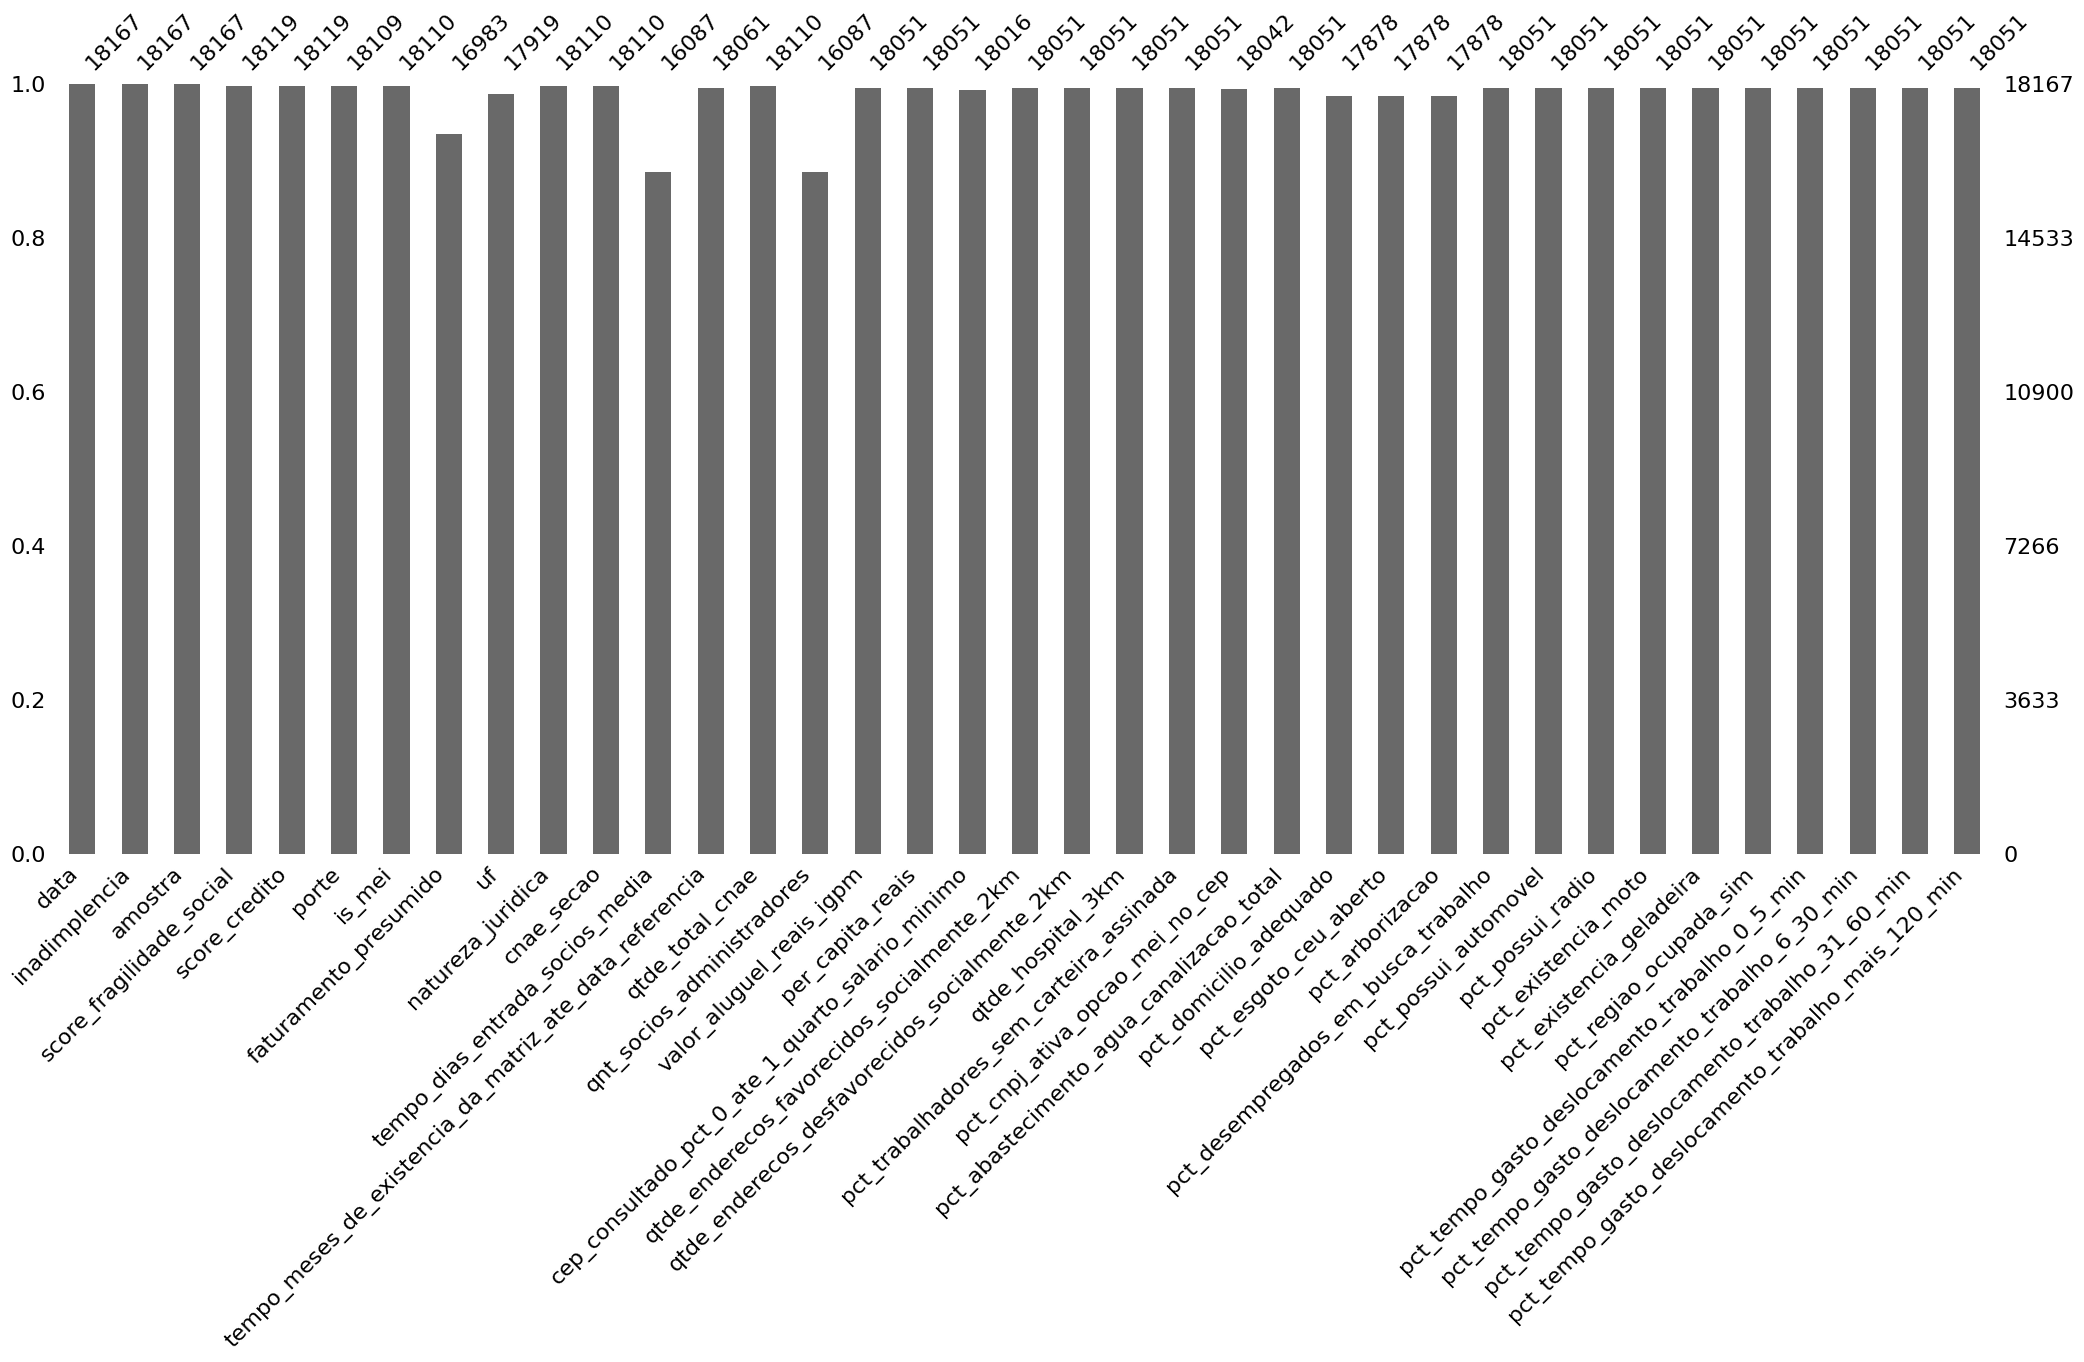

In [4]:
msno.bar(application_df)
plt.show()

# Preenchimento de NA

C:\Users\zheag\AppData\Local\Temp\ipykernel_9780\1153671675.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[coluna].fillna(mediana, inplace=True)
C:\Users\zheag\AppData\Local\Temp\ipykernel_9780\1153671675.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

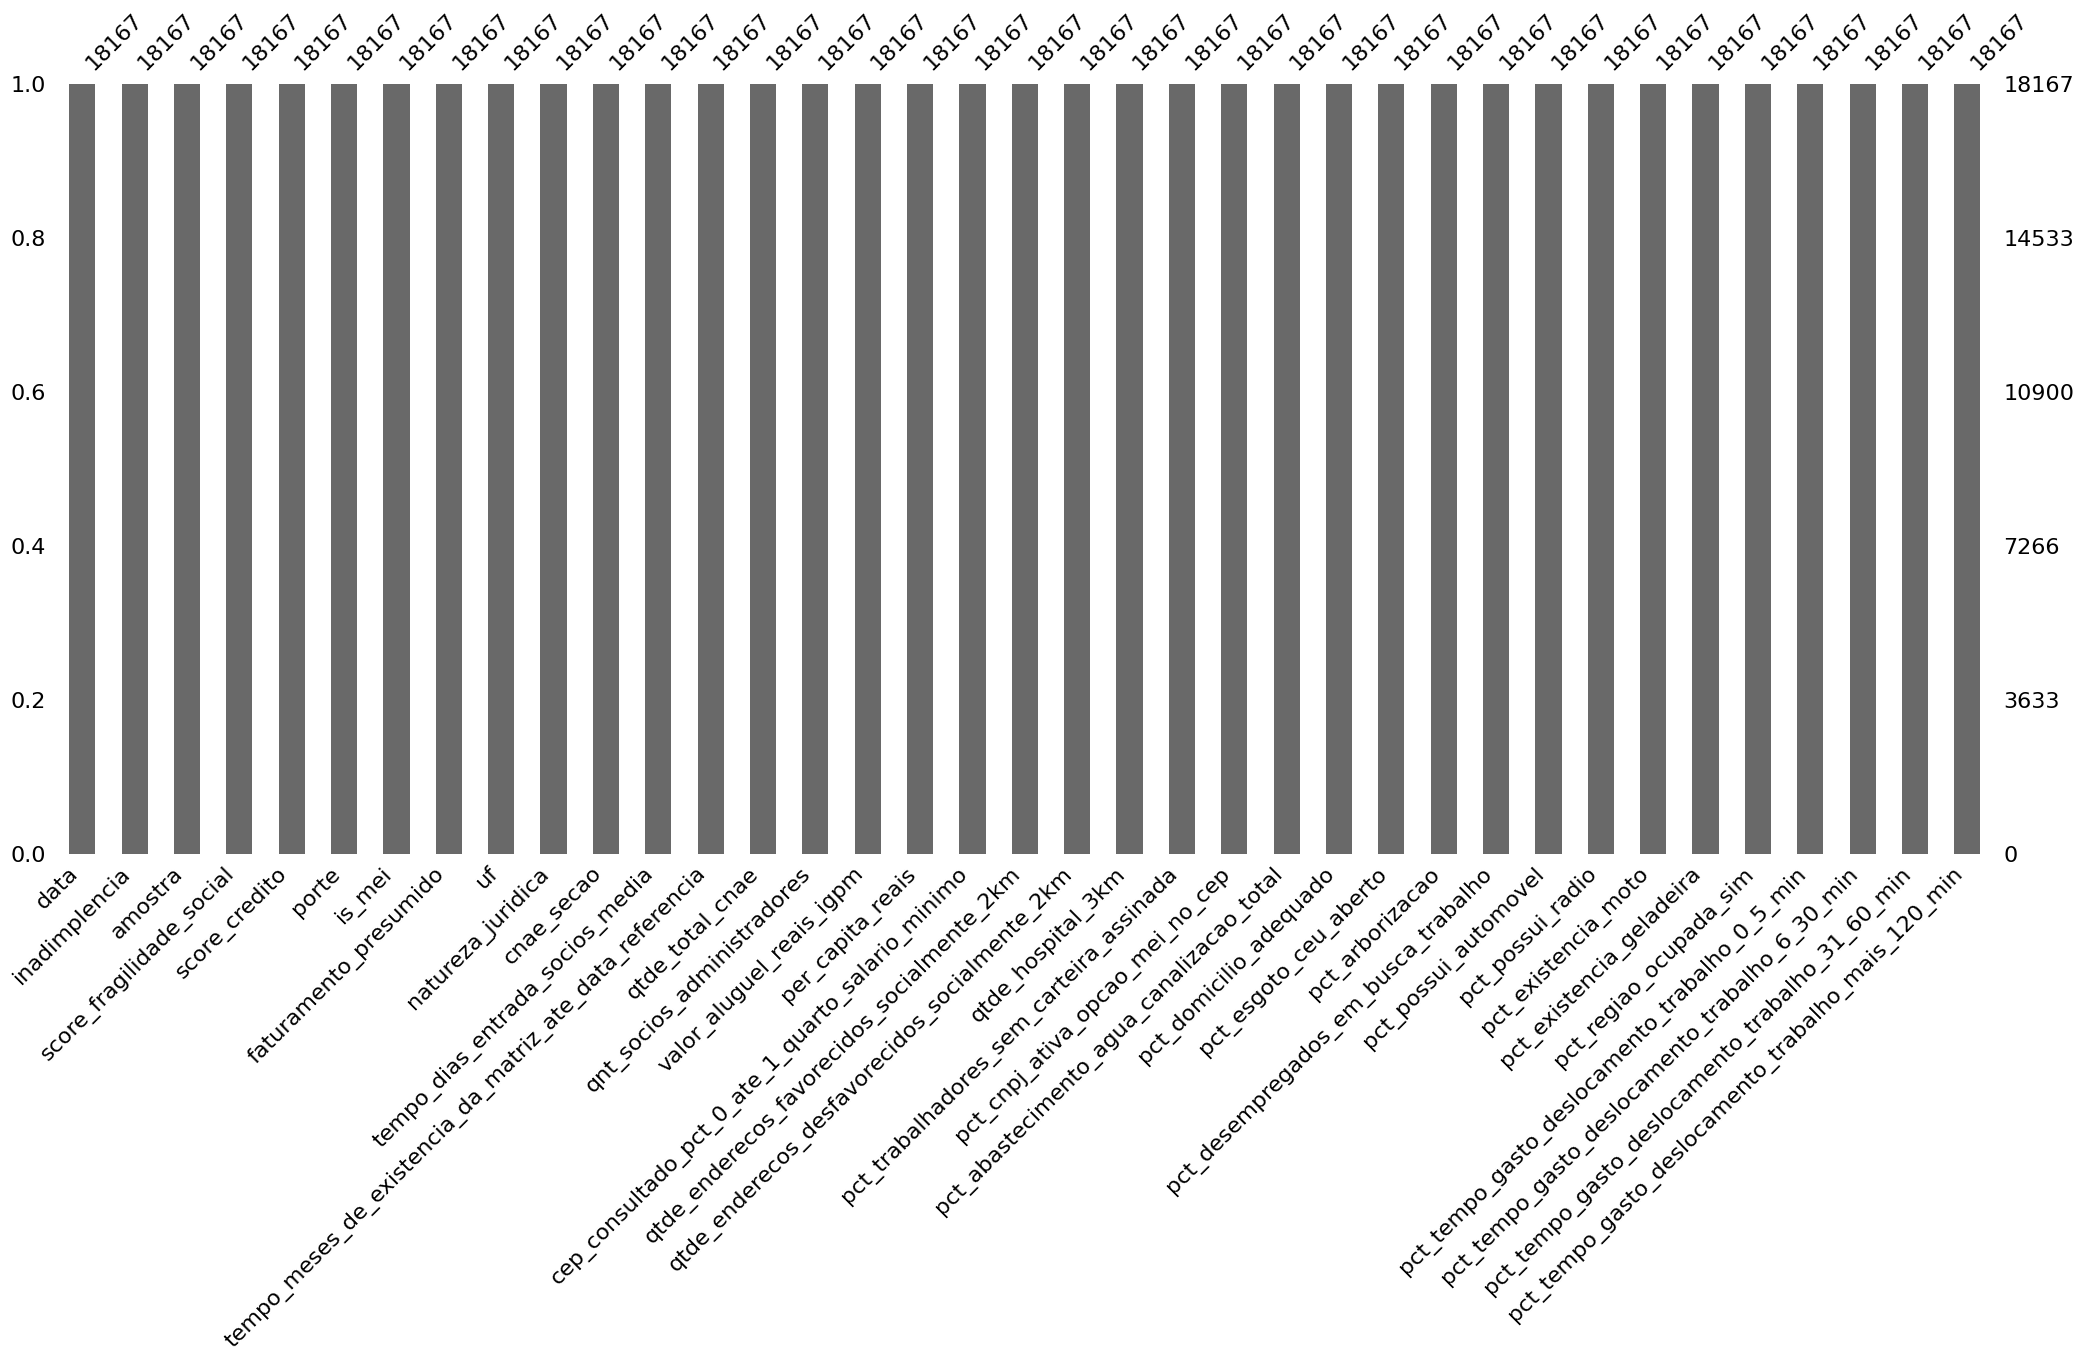

In [5]:
# Vamos preencher valores NA com a mediana caso sejam numéricos e com a moda caso seja categórico
def preencher_com_mediana_e_moda(dataframe):
    for coluna in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[coluna]):
            # Preencher colunas numéricas com a mediana
            mediana = dataframe[coluna].median()
            dataframe[coluna].fillna(mediana, inplace=True)
        elif application_df[coluna].dtype == 'object':
            # Preencher colunas categóricas com a moda
            moda = dataframe[coluna].mode()[0]
            dataframe[coluna].fillna(moda, inplace=True)


# Vamos preencher os valores NA no DataFrame para facilitar nosso estudo
preencher_com_mediana_e_moda(application_df)

# Plota o gráfico de preenchimento de covariáveis do DataFrame
msno.bar(application_df)
plt.show()

# Trativa de Categóricas

In [6]:
application_df.select_dtypes(include='object')

,amostra,porte,uf,natureza_juridica,cnae_secao,qnt_socios_administradores
0,DES,DEMAIS,SP,COOPERATIVA,"Atividades Financeiras, De Seguros E Serviços ...",0.0
1,DES,DEMAIS,MG,SOCIEDADE EMPRESARIA LIMITADA,Comércio - Reparação De Veículos Automotores E...,1.0
2,DES,MICRO-EMPRESA,MG,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,Indústrias De Transformação,0.0
3,DES,DEMAIS,BA,ASSOCIACAO PRIVADA,Outras Atividades De Serviços,0.0
4,DES,DEMAIS,AC,COOPERATIVA,"Atividades Financeiras, De Seguros E Serviços ...",0.0
...,...,...,...,...,...,...
18162,DES,EMPRESA DE PEQUENO PORTE,SP,EMPRESARIO INDIVIDUAL,"Transporte, Armazenagem E Correio",0.0
18163,DES,DEMAIS,SP,SOCIEDADE EMPRESARIA LIMITADA,Comércio - Reparação De Veículos Automotores E...,0.0
18164,DES,MICRO-EMPRESA,BA,SOCIEDADE EMPRESARIA LIMITADA,"Atividades Profissionais, Científicas E Técnicas",1.0
18165,DES,MICRO-EMPRESA,SP,EMPRESARIO INDIVIDUAL,Comércio - Reparação De Veículos Automotores E...,0.0


In [7]:
application_df['porte'].value_counts()

porte
MICRO-EMPRESA               9410
DEMAIS                      5428
EMPRESA DE PEQUENO PORTE    3329
Name: count, dtype: int64

In [8]:
application_df['uf'].value_counts()

uf
SP    5404
MG    2125
RS    1280
RJ    1231
PR    1092
SC    1056
BA     786
GO     621
MT     536
CE     494
ES     468
PA     391
PE     388
AM     322
MA     312
RN     267
DF     193
RO     177
MS     175
TO     163
PB     142
AL     129
PI     124
SE     109
AC      67
AP      58
RR      57
Name: count, dtype: int64

In [9]:
regiao = estados_por_regiao = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

application_df['regiao'] = application_df['uf'].replace(regiao)
application_df.drop('uf', axis = 1, inplace = True)

In [10]:
application_df['regiao'].value_counts()

regiao
Sudeste         9228
Sul             3428
Nordeste        2751
Centro-Oeste    1525
Norte           1235
Name: count, dtype: int64

In [11]:
application_df['natureza_juridica'].value_counts()

natureza_juridica
SOCIEDADE EMPRESARIA LIMITADA                                               10336
EMPRESARIO INDIVIDUAL                                                        3066
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA (DE NATUREZA EMPRESARIA)     2743
ASSOCIACAO PRIVADA                                                            514
SOCIEDADE ANONIMA FECHADA                                                     419
SOCIEDADE SIMPLES LIMITADA                                                    265
SOCIEDADE SIMPLES PURA                                                        185
COOPERATIVA                                                                   110
ENTIDADE SINDICAL                                                              92
Outros                                                                         82
CONSORCIO DE SOCIEDADES                                                        75
SOCIEDADE UNIPESSOAL DE ADVOGADOS                                              6

In [12]:
application_df['natureza_juridica'] = application_df['natureza_juridica'].replace(
    {
        'FUNDACAO PRIVADA' : 'Outros',
        'CONDOMINIO EDILICIO' : 'Outros',
        'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA (DE NATUREZA SIMPLES)' : 'Outros',
    }
)

application_df['natureza_juridica'].value_counts()

natureza_juridica
SOCIEDADE EMPRESARIA LIMITADA                                               10336
EMPRESARIO INDIVIDUAL                                                        3066
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA (DE NATUREZA EMPRESARIA)     2743
ASSOCIACAO PRIVADA                                                            514
SOCIEDADE ANONIMA FECHADA                                                     419
SOCIEDADE SIMPLES LIMITADA                                                    265
SOCIEDADE SIMPLES PURA                                                        185
Outros                                                                        182
COOPERATIVA                                                                   110
ENTIDADE SINDICAL                                                              92
CONSORCIO DE SOCIEDADES                                                        75
SOCIEDADE UNIPESSOAL DE ADVOGADOS                                              6

In [13]:
application_df['cnae_secao'].value_counts()

cnae_secao
Comércio - Reparação De Veículos Automotores E Motocicletas          4616
Atividades Profissionais, Científicas E Técnicas                     2475
Indústrias De Transformação                                          2297
Construção                                                           1762
Atividades Administrativas E Serviços Complementares                 1530
Transporte, Armazenagem E Correio                                     914
Outras Atividades De Serviços                                         892
Informação E Comunicação                                              879
Saúde Humana E Serviços Sociais                                       484
Educação                                                              451
Atividades Financeiras, De Seguros E Serviços Relacionados            407
Agricultura, Pecuária, Produção Florestal, Pesca E Aquicultura        390
Alojamento E Alimentação                                              344
Atividades Imobiliárias    

In [14]:
application_df['cnae_secao'] = application_df['cnae_secao'].replace(
    {
        'Indústrias Extrativas' : 'Outros',
        'Eletricidade E Gás' : 'Outros',
        'Água, Esgoto, Atividades De Gestão De Resíduos E Descontaminação' : 'Outros',
        'Administração Pública, Defesa E Seguridade Social' : 'Outros',
        'Organismos Internacionais E Outras Instituições Extraterritoriais' : 'Outros',
        'Serviços Domésticos' : 'Outros'
    }
)

application_df['cnae_secao'].value_counts()

cnae_secao
Comércio - Reparação De Veículos Automotores E Motocicletas       4616
Atividades Profissionais, Científicas E Técnicas                  2475
Indústrias De Transformação                                       2297
Construção                                                        1762
Atividades Administrativas E Serviços Complementares              1530
Transporte, Armazenagem E Correio                                  914
Outras Atividades De Serviços                                      892
Informação E Comunicação                                           879
Saúde Humana E Serviços Sociais                                    484
Educação                                                           451
Atividades Financeiras, De Seguros E Serviços Relacionados         407
Agricultura, Pecuária, Produção Florestal, Pesca E Aquicultura     390
Alojamento E Alimentação                                           344
Atividades Imobiliárias                                           

In [15]:
application_df['qnt_socios_administradores'].value_counts()

qnt_socios_administradores
0.0    8208
1.0    5433
2.0    3574
3.0     690
4.0     172
>4       90
Name: count, dtype: int64

In [16]:
application_df['qnt_socios_administradores'] = application_df['qnt_socios_administradores'].replace(
    {
        '0.0' : '0',
        '1.0' : '1',
        '2.0' : '2',
        '3.0' : '>=3',
        '4.0' : '>=3',
        '>4' : '>=3'
    }
)

application_df['qnt_socios_administradores'].value_counts()

qnt_socios_administradores
0      8208
1      5433
2      3574
>=3     952
Name: count, dtype: int64

# Salvando a base em CSV

In [17]:
application_df.head(3)

,data,inadimplencia,amostra,score_fragilidade_social,score_credito,porte,is_mei,faturamento_presumido,natureza_juridica,cnae_secao,tempo_dias_entrada_socios_media,tempo_meses_de_existencia_da_matriz_ate_data_referencia,qtde_total_cnae,qnt_socios_administradores,valor_aluguel_reais_igpm,per_capita_reais,cep_consultado_pct_0_ate_1_quarto_salario_minimo,qtde_enderecos_favorecidos_socialmente_2km,qtde_enderecos_desfavorecidos_socialmente_2km,qtde_hospital_3km,pct_trabalhadores_sem_carteira_assinada,pct_cnpj_ativa_opcao_mei_no_cep,pct_abastecimento_agua_canalizacao_total,pct_domicilio_adequado,pct_esgoto_ceu_aberto,pct_arborizacao,pct_desempregados_em_busca_trabalho,pct_possui_automovel,pct_possui_radio,pct_existencia_moto,pct_existencia_geladeira,pct_regiao_ocupada_sim,pct_tempo_gasto_deslocamento_trabalho_0_5_min,pct_tempo_gasto_deslocamento_trabalho_6_30_min,pct_tempo_gasto_deslocamento_trabalho_31_60_min,pct_tempo_gasto_deslocamento_trabalho_mais_120_min,regiao
0,2021-02-10,0,DES,553,842,DEMAIS,False,11000000.0,COOPERATIVA,"Atividades Financeiras, De Seguros E Serviços ...",982.0,590.0,1.0,0,972.634929,5203.00,4.829,3.0,0.0,54.0,10.606,34.43,97.275,99.53,0.00,74.79,5.450,67.505,82.600,88.727,96.855,96.284,16.017,66.450,15.801,0.000,Sudeste
1,2020-07-31,0,DES,783,142,DEMAIS,False,41500.0,SOCIEDADE EMPRESARIA LIMITADA,Comércio - Reparação De Veículos Automotores E...,4107.0,343.0,15.0,1,436.878933,1724.25,4.817,1.0,0.0,14.0,16.518,62.99,97.021,62.51,17.17,43.41,8.718,48.369,89.787,76.305,97.021,95.267,8.681,60.069,28.356,0.231,Sudeste
2,2020-09-24,0,DES,647,647,MICRO-EMPRESA,False,420000.0,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,Indústrias De Transformação,5410.0,364.0,3.0,0,460.712680,1306.25,4.817,1.0,0.0,14.0,14.444,18.18,96.025,62.51,17.17,43.41,7.786,45.980,87.895,76.958,95.483,95.378,7.137,67.407,22.839,0.476,Sudeste


In [18]:
application_df = application_df.drop_duplicates()

application_df.to_csv(
    r"..\..\Bases\StepWise Aplication Data (Modelagem).csv",
    index = False
)